In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset in pandas
df = pd.read_csv("SBI.csv")
#Droping unwanted columns
df.drop(["Date", "Adj Close"], axis=1, inplace=True)
print("Shape ->",df.shape)
df.head()

Shape -> (6353, 5)


,Open,High,Low,Close,Volume
0,18.691147,18.978922,18.540184,18.823240,43733533.0
1,18.894005,18.964767,17.738192,18.224106,56167280.0
2,18.327892,18.568489,17.643839,17.738192,68296318.0
3,17.502312,17.832542,17.223972,17.676863,86073880.0
4,17.738192,17.785366,17.459852,17.577793,76613039.0


In [3]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df['Close_Tom'] =  df['Close']
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,18.691147,18.978922,18.540184,43733533.0,18.823240,18.823240
1,18.894005,18.964767,17.738192,56167280.0,18.224106,18.224106
2,18.327892,18.568489,17.643839,68296318.0,17.738192,17.738192
3,17.502312,17.832542,17.223972,86073880.0,17.676863,17.676863
4,17.738192,17.785366,17.459852,76613039.0,17.577793,17.577793


In [4]:
#Shifting whole dataset down by one row so we can use yesterdays data to predict todays closing price
df['Close_Tom'] =  df['Close_Tom'].shift(-1)
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,18.691147,18.978922,18.540184,43733533.0,18.823240,18.224106
1,18.894005,18.964767,17.738192,56167280.0,18.224106,17.738192
2,18.327892,18.568489,17.643839,68296318.0,17.738192,17.676863
3,17.502312,17.832542,17.223972,86073880.0,17.676863,17.577793
4,17.738192,17.785366,17.459852,76613039.0,17.577793,17.063574


In [5]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close', 'Close_Tom']]
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,18.691147,18.978922,18.540184,43733533.0,18.823240,18.224106
1,18.894005,18.964767,17.738192,56167280.0,18.224106,17.738192
2,18.327892,18.568489,17.643839,68296318.0,17.738192,17.676863
3,17.502312,17.832542,17.223972,86073880.0,17.676863,17.577793
4,17.738192,17.785366,17.459852,76613039.0,17.577793,17.063574


In [6]:
#Filling null values using pad values, will fill next rows values to empty cells
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Open         0
High         0
Low          0
Volume       0
Close        0
Close_Tom    0
dtype: int64

<AxesSubplot:>

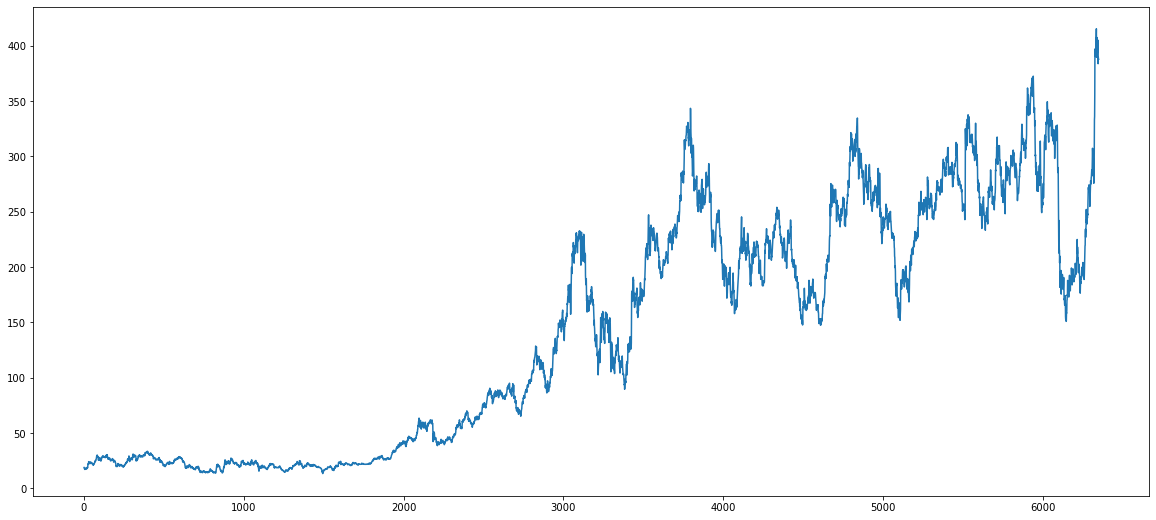

In [7]:
#Dataset Plotted
df['Close'].plot(figsize=(20,9))

In [8]:
#columns for x and y
x  = df[['Open','High','Low','Volume', 'Close']]
y = df['Close_Tom']

In [9]:
#Normalising data
scaler = MinMaxScaler()
df[['Open','High','Low','Volume', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Volume', 'Close']])
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,0.012666,0.012188,0.013299,0.097849,0.013630,18.224106
1,0.013159,0.012154,0.011297,0.125668,0.012139,17.738192
2,0.011783,0.011196,0.011061,0.152806,0.010930,17.676863
3,0.009777,0.009418,0.010013,0.192581,0.010777,17.577793
4,0.010351,0.009304,0.010602,0.171414,0.010530,17.063574


In [10]:
#Splitting data
x_train , x_test , y_train , y_test = train_test_split(x ,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4743, 5)
(1581, 5)
(4743,)
(1581,)


---
# Random Forest

In [11]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
model_rf.fit(x_train, y_train)   

RandomForestRegressor(random_state=0)

In [12]:
#predicting stock price using our model
preds_rf = model_rf.predict(x_test)

dfpred_rf = pd.DataFrame({'Actual':y_test,'Predicted':preds_rf, 'Difference':abs(y_test-preds_rf)})
dfpred_rf.head(10)

,Actual,Predicted,Difference
3787,323.920013,318.589297,5.330716
3717,244.899994,247.747849,2.847855
5401,294.450012,300.986496,6.536484
4262,212.335007,216.347510,4.012503
3160,167.339996,161.098727,6.241269
610,27.253599,26.891758,0.361841
5016,243.800003,244.932649,1.132646
4515,161.490005,164.077402,2.587397
6276,238.699997,245.722598,7.022601
587,26.932802,26.995735,0.062933


In [13]:
#Different Metrics calculated using our model
print("Score:", model_rf.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_rf))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_rf))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_rf))**0.5)
print('Loss:', abs(y_test-preds_rf).mean())

Score: 0.9982965139173496
Mean Absolute Error: 2.7085925828881514
Mean Squared  Error: 19.7634141082295
Root Mean Squared Error: 4.445606157570585
Loss: 2.7085925828881514


---
# k-NN

In [14]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=7)
model_knn.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [15]:
#predicting stock price using our model
preds_knn = model_knn.predict(x_test)

dfpred_knn = pd.DataFrame({'Actual':y_test,'Predicted':preds_knn, 'Difference':abs(y_test-preds_knn)})
dfpred_knn.head(10)

,Actual,Predicted,Difference
3787,323.920013,167.360927,156.559086
3717,244.899994,139.570985,105.329009
5401,294.450012,168.782982,125.667030
4262,212.335007,132.272712,80.062295
3160,167.339996,194.349357,27.009361
610,27.253599,199.295173,172.041574
5016,243.800003,163.106716,80.693287
4515,161.490005,224.894128,63.404123
6276,238.699997,56.153928,182.546069
587,26.932802,117.413552,90.480750


In [16]:
model_knn.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [17]:
#Different Metrics calculated using our model
print("Score:", model_knn.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_knn))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_knn))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_knn))**0.5)
print('Loss:', abs(y_test-preds_knn).mean())

Score: 0.18426839201520195
Mean Absolute Error: 79.37475261330982
Mean Squared  Error: 9463.911524708574
Root Mean Squared Error: 97.28263732397767
Loss: 79.37475261330982


---
# Decision Tree

In [18]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [19]:
#predicting stock price using our model
preds_dt = model_dt.predict(x_test)

dfpred_dt = pd.DataFrame({'Actual':y_test,'Predicted':preds_dt, 'Difference':abs(y_test-preds_dt)})
dfpred_dt.head(10)

,Actual,Predicted,Difference
3787,323.920013,318.500000,5.420013
3717,244.899994,248.949997,4.050003
5401,294.450012,288.750000,5.700012
4262,212.335007,217.074997,4.739990
3160,167.339996,162.320007,5.019989
610,27.253599,27.805559,0.551960
5016,243.800003,248.949997,5.149994
4515,161.490005,159.255005,2.235000
6276,238.699997,246.399994,7.699997
587,26.932802,27.008284,0.075482


In [20]:
#Different Metrics calculated using our model
print("Score:", model_dt.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_dt))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_dt))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_dt))**0.5)
print('Loss:', abs(y_test-preds_dt).mean())

Score: 0.9966633596099098
Mean Absolute Error: 3.6553779301075275
Mean Squared  Error: 38.71085677260005
Root Mean Squared Error: 6.2218049449175155
Loss: 3.6553779301075275


---
# Linear Regression

In [21]:
#linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [22]:
#Coefficients and Intercept of LR
print(model_lr.coef_)
print(model_lr.intercept_)

[-7.41837907e-02  9.00036728e-03  3.58367693e-02 -1.60711010e-09
  1.02943084e+00]
0.17599474096897438


In [23]:
#predicting stock price using our model
preds_lr = model_lr.predict(x_test)

dfpred_lr = pd.DataFrame({'Actual':y_test,'Predicted':preds_lr, 'Difference':abs(y_test-preds_lr)})
dfpred_lr.head(10)

,Actual,Predicted,Difference
3787,323.920013,320.737725,3.182288
3717,244.899994,243.949916,0.950078
5401,294.450012,296.356748,1.906736
4262,212.335007,215.271318,2.936311
3160,167.339996,160.074464,7.265532
610,27.253599,27.436989,0.183390
5016,243.800003,244.661238,0.861235
4515,161.490005,163.933019,2.443014
6276,238.699997,242.611990,3.911993
587,26.932802,27.205066,0.272264


In [24]:
#Different Metrics calculated using our model
print("Score:", model_lr.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_lr))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_lr))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_lr))**0.5)
print('Loss:', abs(y_test-preds_lr).mean())

Score: 0.9986508593023031
Mean Absolute Error: 2.3953065850604256
Mean Squared  Error: 15.65238869305188
Root Mean Squared Error: 3.9563099844491303
Loss: 2.3953065850604256
